# Тема № 27. Нейронные сети, глубокое обучение. Фреймворки.


## Глубокое обучение
Модели, с которыми мы с вами успели познакомиться довольно простые, существуют гораздо более сложные модели, которые занимают много места, считаются долго, но зато дают хорошие результаты.

На примере бустинга и стемминга мы видели, что модели можно соединять друг с другом, и тут возникла идея, а что если соединять между собой простые модельки, но сделать связь между ними более сложной, не даст ли это хорошего результата. 

Так появились нейронные сети, сети из простых соединенных между собой моделей (их называют нейронами), в которых соединения имеют настраиваемые веса - изменяя вес связи нейронов мы можем получать нужную сложность сети в целом. В зависимости от того, как именно соединены нейроны, получаем разные типы нейронных сетей. Нейроны могут располагаться в слоях, когда они работают одновременно (параллельно), или могут быть соединены последовательно, тогда работа следующего зависит от предыдущего, или вообще любым другим способом. Когда в нейронной сети много слоев нейронов, то такую модель называют "глубокой" (иногда "глубинной", англ. deep), а обучение таких глубоких моделей - **глубоким обучением** (deep learning). 

Как выглядят и работают глубокие нейронные сети мы узнаем в следующем классе, а сейчас получим лишь некоторые сведения, которые потребуются в дальнейшем.

## Графические ускорители
Глубокие модели огромны, содержат  тысячи, сотни тысяч и миллионы параметров, которые нужно обучать. Это требует мощных компьютеров. Все настолько серьезно, что обычные компьютеры, которыми вы пользуетесь, слабо подходят для глубокого обучения.

Как вообще сделать компьютер быстрее? Есть два варианта:
- повышать тактовую частоту процессора, которая показывает как часто происходят вычисления. Сегодня привычны процессоры с 3 гигагерцами тактовой частоты, что значит что за одну секунду может произойти 3 *миллиарда* переключений (вычислений). Долгое время компьютеры развивались именно повышением тактовой частоты, но всему есть предел. Теперь повышать тактовую частоту все сложней и сложней, и конечно дороже, это связано с физикой, из за того, что изменения тока в одном проводнике создают электромагнитные колебания, которые просачиваются в соседние проводники, и никуда от этого не денешься. Поэтому сейчас повысить, скажем, в два раза тактовую частоту будет стоить огромных денег, но ускорять компьютер необходимо.
- поэтому есть другой путь для ускорения - делать вычисления одновременно (параллельно) несколькими процессорами и как-то подгадать, чтобы наши алгоритмы могли работать параллельно. Тактовая частота не изменится, но за один такт, имея несколько процессоров, мы можем произвести больше вычислений. И именно по этому пути сегодня развивается вычислительная техника.

Но на пути параллельных вычислений есть свои трудности. Если ваш алгоритм последователен - для следующего действия требуется результат предыдущего - то его никак не выполнить параллельно, один процессор должен ждать, пока не закончит другой. Нужны другие алгоритмы. Оказалось, что и нейронные сети и многие алгоритмы машинного обучения параллельны, значит хорошо подходят для использования на параллельной вычислительной технике.

Сколько процессоров (микропроцессоров, central processing unit, CPU) может быть в обычном компьютере? Два? Четыре? Восемь? Не больше. Значит можно распараллелить вычисления всего-то в восемь раз. Сегодня этого мало. Нужны другие процессоры. Но вот удивительно, в обычном современном компьютере есть такое место, где этих процессоров может быть тысячи. Это **графические ускорители** (графическая плата, видеоплата, graphical processing unit, GPU). Оказывается те графические ускорители, которые вы используете для игрушек, на самом-то деле являются примером параллельных вычислителей, и могут выполнять сложные вычисления.

Особенно отличилась компания NVIDIA которая теперь создает GPU не только для игрушек но и для серьезных расчетов. Именно на таких GPU обучаются большие модели. Почему же? В чем причина такой популярности GPU?

Давайте посмотрим на картинку со схемой типичного CPU и GPU.

![img](https://drive.google.com/uc?id=1Yv-8ed37V7LDeU3z9TGEOCNT_yeWIVhh)

У CPU есть несколько (2-8) арифметико-логических устройств (ALU, зеленые) которые выполняют вычисления и могут работать параллельно, есть довольно большая и быстрая память кэша (cache) которая доступна всем ALU и которая используется для подгрузки нужных данных и память DRAM помедленнее, которую используют для хранения данных и сложное устройство управления (control), которое управляет всеми этими устройствами по отдельности. 

У GPU же есть много (сотни) ALU, но они гораздо более простые, работают на меньшей частоте, памяти DRAM существенно меньше (но возможно она быстрее), и устройство управления попроще, поскольку здесь нельзя управлять каждым ALU по отдельности, а только группой связанных ALU. Такая архитектура с одной стороны очень подходит для параллельных вычислений, но с другой сильно ограничивает возможности. К примеру, если в группе у вас 32 ALU, а нужно сложить только два числа, то все остальные все равно будут заниматься сложением чисел, хоть это вам и не надо, т.е. выполнять лишнюю бесполезную работу - это из-за того, что можно управлять группой целиком, а не отдельным ALU. **Не все можно эффективно распараллелить!**. 

Программирование параллельных вычислителей гораздо сложней, но к счастью, сегодня есть средства, которые делают работу за нас.

## Фреймворки глубокого обучения
Созданы **фреймворки глубокого обучения** специальные библиотеки программ, которые позволяют работать с нейронными сетями (и другими алгоритмами машинного обучения) и уже из коробки могут задействовать всю мощь GPU. Познакомимся кратко с некоторыми из них.


Основой любого фреймворка глубокого обучения является **автодифференцирование**. Мы уже упоминали, что самым популярным методом обучения является градиентный спуск и его модификации, для чего необходимо считать производные функции ошибки по всем настраиваемым параметрам. Вспомним школьное правило дифференцирования сложных (составных) функций: пусть, например, функция А зависит от функций В и С, которые зависят от аргумента х, тогда производная A по x получается как: \\(  A(B(x),C(x)) ==> \frac{\partial A}{\partial x} = \frac{\partial A}{\partial B} * \frac{\partial B}{\partial x} + \frac{\partial A}{\partial C} * \frac{\partial C}{\partial x}\\)

Значит для любой дифференцируемой функции мы можем найти производную, составив дерево зависимостей функций друг от друга и применяя такие правила. Даже если наши "функции" это программы, которые принимают некоторые аргументы, возвращают некоторые значения. Например программа А - складывает два аргумента, В - умножает входной аргумент на 3, С - возводит входной аргумент в квадрат, тогда получим:

$$ A=B+C ==> \frac{\partial A}{\partial B} = 1,   \frac{\partial A}{\partial C} = 1, \\
B=3*x ==> \frac{\partial B}{\partial x} = 3 \\ 
C=x*x ==> \frac{\partial C}{\partial x} = 2 * x \\ 
и\ окончательно\ \frac{\partial A}{\partial x} = 1 * 3+1 * (2 * x) $$

Если мы знаем производные выхода программы по ее входам, то можем найти такие производные и для других программ, которые вызывают первую. И конечно это можно делать автоматически. При вызове программ нужно записывать дерево вычислений - какие программы друг друга вызывали, а когда потребуется вычислить производную - посмотреть на это дерево вычислений и применить правила для расчета производных составных функций. Если все действия в программе дифференцируемы (или могут быть принудительно сделаны дифференцируемыми), то можем найти и производную по любому аргументу этой программы. Это и есть автодифференцирование.





В фреймворках модели представляют собой некоторые объекты, которые поддерживают автодифференцирование. И тогда создавая модель, например добавляя в нее слои, функции, входы и пр. мы можем потом искать и производные и тем самым обучать модель.

Один из самых известных фреймворков глубокого обучения [TensorFlow](https://www.tensorflow.org/tutorials/quickstart/beginner) и его надстройка [Keras](https://keras.io/getting_started/). Вот как выглядит пример реализации модели на нем:

``
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
``

Создается последовательная модель  `Sequential` в которую постепенно добавляются слои нейронов или функций, выход одного слоя является входом  следующего, а это и есть дерево связей, здесь оно последовательное, без разветвлений. Конечно для моделей реализованы методы для обучения разными способами, расчета выходов и др., они могут называться по-другому чем в `sklearn` но смысл их такой же. Например метод `.fit()` что делает? Правильно, обучает модель на заданных примерах, а метод `.evaluate()`? Можно догадаться по названию (а лучше конечно смотреть в документации), что это оценка работы метода для заданных примеров (в `sklearn` в точности такого же метода нет, но похоже на `.score()`).


Другой известный фреймворк [PyTorch](https://pytorch.org/tutorials/) тоже строит граф вычислений и позволяет посмотреть на него (функция `make_dot` из библиотеки `torchviz`). 

Посмотрим на пример:


In [2]:
!pip install torchviz

     |████████████████████████████████| 51kB 5.1MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=07a8692f3dc3bc4f207cd187d225ad0455c5972b4538c13443225f8449d22893
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


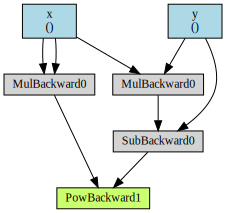

In [3]:
import torch # подключаем torch

# задаем вычисления
x = torch.tensor(1.0, requires_grad = True) # исходная переменная х
y = torch.tensor(2.0,requires_grad = True) # исходная переменная у

#какие-то вычисления:
z = x * y # перемножаем
c=x*x # квадрат
d=y-z # вычитание
e=c**d # степень
from torchviz import make_dot # для просмотра графа вычислений
params=dict(x=x,y=y) # названия переменных
make_dot(e,params=params)  # строим граф

Отображаются исходные переменные и действия, которые с ними проводились. По названию можно догадаться что за действия: Mul - умножение, Sub - вычитание, Pow - степень.

Посмотрите на картинку и объясните каждую стрелку, найдите и укажите место где получаются переменные z, c, d, e.

Сделайте аналогично для своих примеров вычислений.

## Библиотека PuzzleLib
Вообще всяких разных фреймворков глубокого обучения сделано уже много, см., например, [здесь](https://towardsdatascience.com/top-10-best-deep-learning-frameworks-in-2019-5ccb90ea6de). 

Россия не отстает, и наши компании тоже делают похожие фреймворки, с одним из них мы познакомимся поближе и будем использовать его в дальнейшем, это библиотека [PuzzleLib](https://puzzlelib.org/). Она создана совсем недавно, и разнообразие функций не так велико, как хотелось бы, но библиотека развивается, и на некоторых тестах даже превосходит известные фреймворки. Что особенно приятно - библиотека имеет документацию на русском языке. Разработчики библиотеки очень серьезно относятся к удобству именно русскоязычных пользователей, собственно данный курс и создан с этой целью.   

Библитотека состоит из нескольких разделов, содержащих необходимые инстурменты для создания и обучения своей нейронной сети.

- [Modules](https://puzzlelib.org/documentation/base/modules/Modules/): Основные блоки искусственных нейронных сетей, разные типы слоев нейронов, функции преобразования.
- [Containers](https://puzzlelib.org/documentation/base/containers/Containers/): инструменты для соединения модулей,  установки связей между слоями нейронной сети. Позволяет соединять слои параллельно, последовательно и в виде заданного графа.
- [Cost](https://puzzlelib.org/documentation/base/cost/Costs/): различные функции ошибки.
- [Optimizers](https://puzzlelib.org/documentation/base/optimizers/Optimizers/): методы оптимизации функции ошибки, основанные на градиентном спуске.
- [Handlers](https://puzzlelib.org/documentation/base/handlers/Handlers/): вспомогательные инструменты для облегчения обучения, расчета и проверки нейронных сетей.
- [Transformers](https://puzzlelib.org/documentation/base/transformers/Transformers/): инструменты для преобразования обучающих данных налету, в процессе обучения.


Подробно про эту библиотеку мы поговорим на следующих уроках, когда будем изучать нейронные сети. 